## <h3 align="center">Statistical Analysis and Modeling of Neural Data (NEU 560)</h3>
<h4 align="center">Princeton University, Spring 2018</h4>
<h4 align="center">Jonathan Pillow</h4>

---
## Homework 2: Probability & Info Theory
#### Due: Wednesday, 3/28 at 11:59pm

---
### Formatting Instructions
- Please prepare your homework submission completely within this notebook file (*.ipynb*). For each problem or sub-problem, please **limit yourself to one Code cell and/or one Markdown cell** as appropriate (switch between them by using the menu at the top, or the shortcuts `Esc + M` for Markdown and `Esc + Y` for Code). Of course, feel free to use as many cells as you like in the course of working on the homework, just clean and condense once you're done!

- Comments within code cells can be useful for explaining your code and thought process as necessary (anything following a `#` is a comment in Python; you can quickly (un)comment blocks of code by highlighting it and using the shortcut `Cmd + /`. See the posted solution for Homework 0 for examples of the desired formatting).

- Late submissions will be penalized 10% per day.

- Make sure to hit `Kernel -> Restart & Run All` before submitting to catch any final errors! The AIs will be restarting your notebooks before grading them, so all results need to be able to be generated from scratch.

- All problems or sub-problems are worth 1pt each unless otherwise marked.

---
### Using Jupyter Notebooks
To run a cell and advance to the next cell, press `Shift + Return`

To run a cell without advancing to the next cell, press `Control + Return` 

You can find a variety of shortcuts at **Keyboard Shortcuts** in the Help menu above

**If you're confused:** Google and Python are the best of friends! Throw a few words describing your problem into Google and click on the first Stack Overflow link — this will solve 95% of your problems!

If you would simply like to know more about a particular function, press `Shift + Tab` while inside the function to bring up a snippet of documentation; press `Tab` again (while still holding `Shift`) to bring up an even larger box of documentation; a third press of `Tab` will turn the bottom half of your screen into a window with the full documentation for your function (including definitions of the function's inputs, outputs, parameters and their default settings, and often some example code!)

---
Before we start let's run some magic commands to automatically save our progress once a second (with `%autosave 1`), force all graphics from the `matplotlib` package to be displayed inline (with `%matplotlib notebook`), and then import some of our favorite packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline
%autosave 1

Autosaving every 1 seconds


---
## Marginal & Conditional Probability Densitites

Load the file `pdfData2D.mat`, which contains a discretely sampled 2D probability density. The variables defined include: 

$\quad$ `x` = a vector of $x$ points

$\quad$ `y` = a vector of $y$ points

$\quad$ `Pxy` = a 2D matrix, whose $i, j$ 'th entry is the probability $P(y = {\tt y[i]}, x = {\tt x[j]})$ 
 
*Note:* `np.sum(Pxy) * dx * dy = 1`, where `dx = x[2] - x[1] = .1 = dy`.  You can visualize this density in Python via the command:

`plt.imshow(Pxy, aspect='auto')`

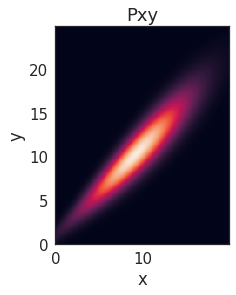

In [2]:
#Read in the variables from pdfData2D.mat
from scipy.io import loadmat
data = loadmat('pdfData2D.mat')
x = data['x'].squeeze()
y = data['y'].squeeze()
Pxy = data['Pxy'].squeeze()

plt.figure()
plt.imshow(Pxy, origin='lower', interpolation='none', 
           extent=(x[0],x[-1],y[0],y[-1]))
plt.title('Pxy')
plt.xlabel('x')
plt.ylabel('y');

**1)** From this joint two-dimensional density, compute and make plots (or images) of

- $P(x)$ : the marginal distribution over x

- $P(y)$ : the marginal distribution over y

- $P(y\,|\,x=5)$ : the conditional over $y$ given $x=5$

- $P(x\,|\,y)$ : the full image of the conditional density $P(x\,|\,y)$

- $P(y)P(x)$ : image of the independent approximation to $P(x, y)$

**(1 point each)**

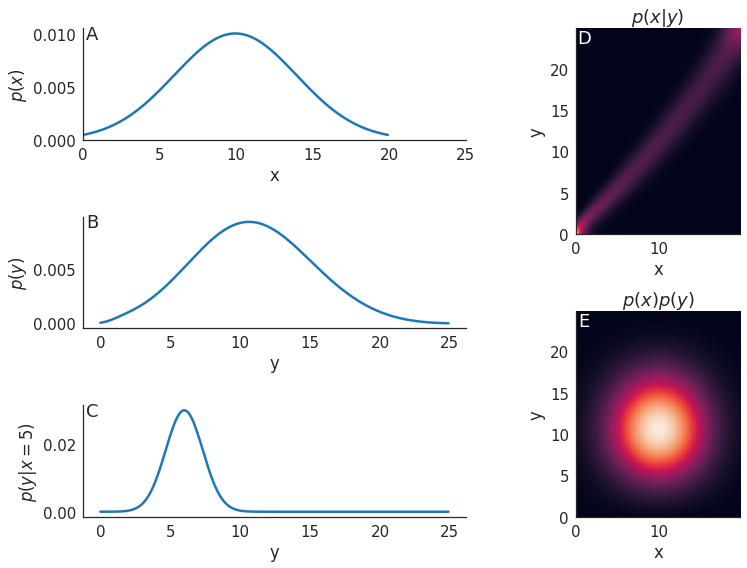

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Compute probability densities.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## 1) Marginal distribution over x.
Px = Pxy.sum(axis=0) / Pxy.sum()

## 2) Marignal distribution over y.
Py = Pxy.sum(axis=1) / Pxy.sum()

## 3) Condition over y given x = 5.
Py_x5 = Pxy[:, x == 5] / Pxy[:, x == 5].sum()

## 4) Full image of condition density, P(x | y).
Px_y = (Pxy.T / Pxy.sum(axis=1)).T

## 5) Image of independent approxiation, P(x,y).
Pxy_ind = np.outer(Py, Px)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(12,8))

## Plot (1).
ax = plt.subplot2grid((6,2),(0,0),rowspan=2)
ax.plot(x, Px, lw=2.5)
ax.set(xlim=(0,25), xlabel='x', ylabel='$p(x)$')
ax.annotate('A', (0,0), (0.025,0.95), xycoords='axes fraction', 
            ha='center', va='center', fontsize=18)

## Plot (2).
ax = plt.subplot2grid((6,2),(2,0),rowspan=2)
ax.plot(y, Py, lw=2.5)
ax.set(xlabel='y', ylabel='$p(y)$')
ax.annotate('B', (0,0), (0.025,0.95), xycoords='axes fraction', 
            ha='center', va='center', fontsize=18)

## Plot (3).
ax = plt.subplot2grid((6,2),(4,0),rowspan=2)
ax.plot(y, Py_x5, lw=2.5)
ax.set(xlabel='y', ylabel='$p(y|x=5)$')
ax.annotate('C', (0,0), (0.025,0.95), xycoords='axes fraction', 
            ha='center', va='center', fontsize=18)

## Plot (4).
ax = plt.subplot2grid((6,2),(0,1),rowspan=3)
ax.imshow(Px_y, origin='lower', interpolation='none', 
           extent=(x[0],x[-1],y[0],y[-1]))
ax.set(xlabel='x', ylabel='y', title='$p(x | y)$')
ax.annotate('D', (0,0), (0.05,0.95), xycoords='axes fraction', 
            ha='center', va='center', fontsize=18, color='w')

## Plot (5).
ax = plt.subplot2grid((6,2),(3,1),rowspan=3)
ax.imshow(Pxy_ind, origin='lower', interpolation='none', 
           extent=(x[0],x[-1],y[0],y[-1]))
ax.set(xlabel='x', ylabel='y', title='$p(x)p(y)$')
ax.annotate('E', (0,0), (0.05,0.95), xycoords='axes fraction', 
            ha='center', va='center', fontsize=18, color='w')

sns.despine()
plt.tight_layout()

**2)**  Three common statistics one might wish to compute from a density are its mean, mode, and median.  

- The *mean* is the average value, given by $\mathbb{E}[x] = \int x P(x) dx$ when $P(x)$ is a pdf, and $\mathbb{E}[x] = \sum_{i} x_i P(x_i)$ when $P(x)$ is a pmf.


- The *mode* is the value $x$ where $P(x)$ takes its maximum. We
  can write this (fancily, if we like) as $\arg\max_x P(x)$. 


- The *median* is the value of $x$ where half the probability
  mass $P(x)$ is to the left (smaller than $t$) and half the
  probability is to the right (greater than $t$). In math notation,
  this corresponds to saying that the mode $t$ satisfies 
  
$$\int_{-\infty}^t P(x)\, dx  = \int_t^\infty P(x)\, dx = \frac{1}{2}$$

Compute the mean, mode and median of the marginal $P(x)$ and of the conditional $P(x|y=3)$.  

**(6 points total)**

In [4]:
## Define functions.
def mean(x, p):
    return np.dot(x, p)

def mode(x, p):
    return x[np.argmax(p)]
    
def median(x, p):
    
    ## Sort x & p by x.
    p = p[np.argsort(x)]
    x = x[np.argsort(x)]
    
    ## Compute cumulative probability.
    cumsum = np.cumsum(p)
    
    ## Find closest to 0.5
    ix = np.argmin(np.abs(cumsum - 0.5))
    return x[ix]

**Answer:** Marginal of x.

In [5]:
Px = Pxy.sum(axis=0) / Pxy.sum()
print('Mean p(x) = %0.2f' %mean(x, Px))
print('Mode p(x) = %0.2f' %mode(x, Px))
print('Median p(x) = %0.2f' %median(x, Px))

Mean p(x) = 9.95
Mode p(x) = 10.00
Median p(x) = 9.90


**Answer:** Conditional $P(x \mid y = 3)$ 

In [6]:
Pxy3 = Pxy[y == 3].squeeze() / Pxy[y == 3].sum()
print('Mean p(x) = %0.2f' %mean(x, Pxy3))
print('Mode p(x) = %0.2f' %mode(x, Pxy3))
print('Median p(x) = %0.2f' %median(x, Pxy3))

Mean p(x) = 2.82
Mode p(x) = 2.40
Median p(x) = 2.60


---
## Bayes' Rule
**3)**
Take $P(y\,|\,x)$ as computed above, and assume that it describes
  the noisy process by which a variable $x$ is transformed into a
  noisy measurement $y$.  Suppose that we are given a prior
  distribution over $x: P(x) = \mathcal{N}(5,4)$, a Gaussian with
  mean 5 and variance 4 (stdev = 2).  Compute the posterior
  distribution $P(x\,|\,y)$ given this new prior, and plot an image of it
  (i.e. showing $P(x\,|\,y)$ for every possible value of $x$ and $y$).

$$ p(x \mid y ) = \frac{p(y \mid x)p(x)}{p(y)}$$

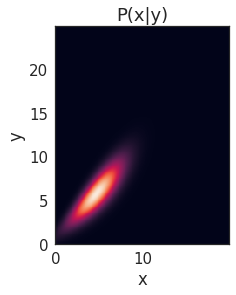

In [7]:
## Define normal PDF.
def normal_pdf(x, mu, sd):
    return np.sqrt(2 * np.pi * sd**2) ** -1 * np.exp(-(x-mu)**2 / (2 * sd**2))

## Compute likelihood.
Py_x = Pxy / Px

## Compute prior.
Px = normal_pdf(x, 5, 2) 
Px /= Px.sum()

## Compute posterior distribtion.
Px_y = (Py_x * Px) / (Py_x * Px).sum()

## Plot.
plt.figure()
plt.imshow(Px_y, origin='lower', interpolation='none', 
           extent=(x[0],x[-1],y[0],y[-1]))
plt.title('P(x|y)')
plt.xlabel('x')
plt.ylabel('y');

**4)**
Make a plot showing the *maximum a posteriori* (MAP)
  estimate $x_{MAP}$ as a function of noisy measurement $y$, where $
  x_{MAP} = \arg\max_x P(x\,|\,y)$ is the mode of the posterior
  distribution.  That is, plot the most probabile value of $x$ under
  the posterior, for every value of $y$.

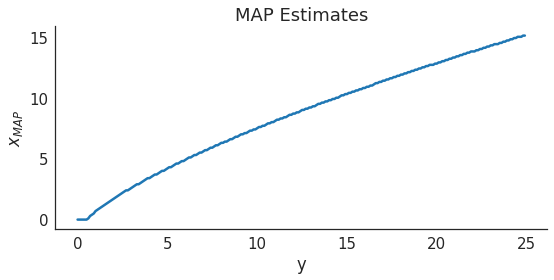

In [8]:
## Compute MAP estimates.
MAP = x[np.argmax(Px_y,axis=1)]

## Plotting
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(y, MAP, lw=2.5)
ax.set(xlabel='y', ylabel='$x_{MAP}$', title='MAP Estimates')
sns.despine()
plt.tight_layout()

---
## Multivariate Gaussians

**5)**
Write your own function `mvnDensity()`, which evaluates a
  multivariate Gaussian density at a single point given a mean vector and a
  covariance matrix (No cheating by using high level NumPy functions!).
  You may recall that the
  formula for a multivariate Gaussian density is:
  
$$P(x) = \frac{1}{\sqrt{|2\pi \Sigma|}} \exp\left( -\frac{1}{2} (\vec x - \vec \mu)^T \Sigma^{-1} (\vec x - \vec \mu) \right)$$
  where $|\cdot|$ denotes the matrix determinant.  The function should
  take as input a vector $\vec x$, a vector mean $\vec \mu$ and the
  covariance matrix $\Sigma$. 
  
  **(2 points)**

In [9]:
def mvnDensity(x, mu, cov):
    a = 1 / np.sqrt( np.linalg.det(2 * np.pi * cov) )
    b = (x - mu).T @ np.linalg.inv(cov) @ (x - mu)
    return a * np.exp(-0.5 * b)

**6)**
Use `np.meshgrid()` to create a lattice of `X` and `Y` points, and
  then generate a 2D ("bivariate") Gaussian density over this
  lattice.  Make images using `plt.imshow()` showing a
  bivariate Gaussian with positive correlation,  and another with
  negative correlation.  
  
  **(1 point each)**

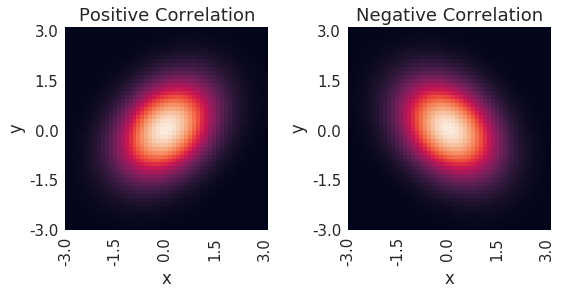

In [10]:
## Define grid
n = 51
x = y = np.linspace(-3, 3, n)
xy = np.array(np.meshgrid(x,y)).T.reshape(n**2, 2)

## Define multivariate parameters.
mu = np.zeros(2)
cov_p = np.array([[1,0.3],[0.3,1]])
cov_n = np.array([[1,-0.3],[-0.3,1]])

## Plot PDF.
fig, axes = plt.subplots(1,2,figsize=(8,4))
ticks = np.linspace(0, n-1, 5)
ticklabels = np.linspace(-3, 3, 5)

## Plot positive correlation.
pdf_p = np.apply_along_axis(mvnDensity, 1, xy, mu, cov_p)
sns.heatmap(pdf_p.reshape(n,n), square=True, cbar=False, ax=axes[0])
axes[0].set(xticks=ticks, xticklabels=ticklabels, xlabel='x', 
            yticks=ticks, yticklabels=ticklabels, ylabel='y', 
            title='Positive Correlation')
axes[0].invert_yaxis()

## Plot positive correlation.
pdf_n = np.apply_along_axis(mvnDensity, 1, xy, mu, cov_n)
sns.heatmap(pdf_n.reshape(n,n), square=True, cbar=False, ax=axes[1])
axes[1].set(xticks=ticks, xticklabels=ticklabels, xlabel='x', 
            yticks=ticks, yticklabels=ticklabels, ylabel='y', 
            title='Negative Correlation')
axes[1].invert_yaxis()

plt.tight_layout()

**7)** 
Write another function, `mvnRand()`, that draws samples from
  a multivariate Gaussian density given a mean $\mu$ and covariance
  matrix $\Sigma$.  Note that we can generate Gaussian samples with
  covariance $A A^T$ and mean $\mu$ using the affine mapping $A\vec x +
  \vec \mu$, where $\vec x$ is sampled from a Gaussian with zero-mean
  and identity covariance.  (Thus, if $\Sigma$ is the desired
  covariance matrix, we need $A$ such that $AA^T=\Sigma$.  
  
*Hint:* How can you use the SVD of $\Sigma$ to find a suitable $A$?  

**(2 points)**

**Answer:** We set the covariance matrix $\Sigma$ equal to the following:

$$ \Sigma = AA^T $$ 

where the singular value decomposition of $A$ is equal to:

$$ A = USV^T $$

where $S$ is a diagonal matrix comprised of the singular values of $A$. Thus what we have is:

$$ \Sigma = \left( USV^T \right) \left( USV^T \right)^T $$

$$ = \left( USV^T \right) \left( VSU^T \right) $$

$$ = \left( US \right) I \left( SU^T \right) $$

$$ = US^2U^T $$

If we want to derive $A = USU^T$ then we simply need to take the square root of the singular values.

In [11]:
def mvnRand(mu, cov, size=1):
    
    ## Perform SVD on covariance matrix.
    U, S, Vt = np.linalg.svd(cov)

    ## Construct affine mapping matrix.
    A = U @ np.diag(np.sqrt(S)) @ U.T
    
    ## Sample values.
    x = np.random.normal(size=(mu.size, size))
    
    return (A @ x).T + mu

**8)**
Generate two scatter plots showing 100 samples from each of the
  two 2D Gaussians whose pdfs you visualized above.  
  
  **(1 point each)**

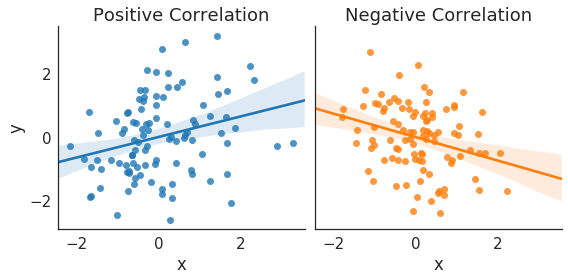

In [12]:
## Plot scatterplots.
fig, axes = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
np.random.seed(47404)

for ax, cov, title in zip(axes, [cov_p, cov_n], ['Positive','Negative']):
    
    ## Generate data.
    data = mvnRand(mu, cov, 100)
    
    ## Plot.
    sns.regplot(*data.T, ax=ax)
    ax.set(xlabel='x', title='%s Correlation' %title)
    if title == 'Positive': ax.set_ylabel('y')
    
sns.despine()
plt.tight_layout()

---
## Expectations
**9)**
Compute the $\mathbb{E} [X^4]$, the 4th moment (or expectation of the 4th power) of a standard Gaussian random variable, that is $X \sim \mathbb{N} (0, 1)$ using two different methods. 

**(2 points each)**

**a)** Compute the expectation numerically by gridding the normal distribution up over some range (e.g., $x$ ranging from $−6$ to $6$ with spacing $dx = .01$). Then calculate the expectation using the numerical approximation to the integral, formed by the sum $\sum_i x_i^4\, p(x_i)\, dx$.

In [13]:
## Sample along x-axis.
x = np.linspace(-6,6,1201)

## Compute probability density.
Px = normal_pdf(x, 0, 1)
Px /= Px.sum()

## Calculate expectation.
print('x^4 = %0.3f' %np.dot( np.power(x, 4), Px ))

x^4 = 3.000


**b)** Now compute the expectation using *Monte Carlo integration*. Monte Carlo integration is a technique for computing expectations using random samples from the distribution. Specifically, one draws samples from the distribution in question and then takes an average over the value of the function at each sample.  Personally, I find this to be a more intuitive procedure for evaluating expectations than the numerical integral given in part a; it accords much more closely with the fact that the expectation is simply an "average" value of some function (where average is over some distribution). 

Formally, the Monte Carlo integral can be written as:

$$\mathbb{E}[f(x)] =  \frac{1}{N} \sum_{i=1}^N f(x_i)$$

in the limit of $N\longrightarrow \infty$.  In practice we evaluate a Monte Carlo integral by setting $N$ to some large value, e.g., $N = 10^4$. 

To compute the above expectation using Monte Carlo integration, draw $N$ samples (try using $N = 1000$ to start and increase from there for more accuracy) from a Gaussian, calculate the value of $x^4$ for each, and take the average of these values. Repeat this experiment $m$ times (try with $m = 10$, then $m = 100$) and give the mean of these $m$ values as your estimate, and their standard deviation as 1SD error bars.

(Do the two estimates agree?)

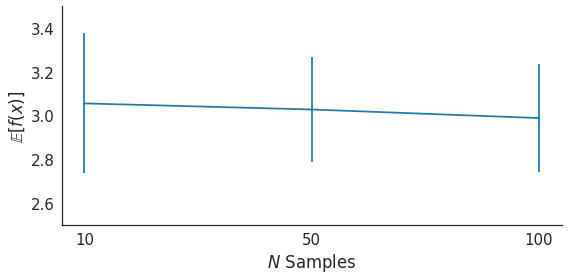

In [14]:
## Define parameters.
np.random.seed(47404)
N = 1000
m = 10000

## Compute expectations
expectation = np.zeros(m)
for i in np.arange(m): 
    sample = np.random.normal(0,1,size=N)
    expectation[i] = np.power(sample, 4).mean()
                              
## Compute summary statistics.
indices = [10, 50, 100]
mu = np.zeros_like(indices, dtype=float)
sd = np.zeros_like(indices, dtype=float)

for i, j in enumerate(indices):
    mu[i] = expectation[:j].mean()
    sd[i] = expectation[:j].std()
    
## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.errorbar(np.arange(len(indices)), mu, yerr=sd)
ax.set(xticks=np.arange(len(indices)), xticklabels=indices, xlabel='$N$ Samples', 
       ylim=(2.5, 3.5), ylabel='$\mathbb{E}[f(x)]$')

sns.despine()
plt.tight_layout()

**Answer:** The two estimates agree.

**10)**
Use the same two methods to compute the variance of $X$, where $X$ is the number of heads obtained when
flipping a fair coin 20 times. Recall that variance is given by the expectation $\mathbb{E}[(X − \mathbb{E}[X])^2]$.

Note that (for the *gridding* method) your grid over $X$ should include only the possible real
outcomes (i.e., integers between 0 and 20). Compute the
binomial distribution **pmf** yourself using the formula $P(X = k \; \big\vert \; p,n) = {n \choose k} p^k (1−p)^{n−k}$, where
$p = 0.5$ and $n = 20$. The function `comb()` which computes ${n \choose k}$ has been imported for you below.

For the Monte Carlo estimate, generate the 20 coin flips for each experiment yourself using `np.random.rand()`. Feel free to use the fact that we already "know" the expectation $\mathbb{E}[X] = 10$ here when evaluating $f(X) = (X − \mathbb{E}[X])^2$ on each sample. Once again, report 1SD error bars for your estimate.

**(2 points each)**

In [15]:
from scipy.special import comb

## Define function.
def binomial_pmf(k,n,p):
    return comb(n,k) * p ** k * (1 - p) ** (n-k)

## Define sampling space.
k = np.linspace(0,20,21)

## Compute pmf.
Pk = binomial_pmf(k, 20, 0.5)

## Compute expected mean.
mu = np.dot(k, Pk)

## Compute expected variance.
var = (np.power(k - mu, 2) * Pk).sum()

print('Expected variance: %0.3f' %var)

Expected variance: 5.000


**Answer:** Monte Carlo

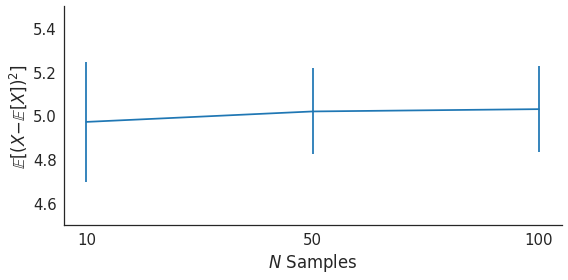

In [16]:
## Define parameters.
np.random.seed(47404)
N = 1000
m = 1000

## Compute expectations
expectation = np.zeros(m)
for i in np.arange(m): 
    sample = np.random.binomial(20,0.5,size=N)
    expectation[i] = np.var(sample)
                              
## Compute summary statistics.
indices = [10, 50, 100]
mu = np.zeros_like(indices, dtype=float)
sd = np.zeros_like(indices, dtype=float)

for i, j in enumerate(indices):
    mu[i] = expectation[:j].mean()
    sd[i] = expectation[:j].std()
    
## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.errorbar(np.arange(len(indices)), mu, yerr=sd)
ax.set(xticks=np.arange(len(indices)), xticklabels=indices, xlabel='$N$ Samples', 
       ylim=(4.5, 5.5), ylabel='$\mathbb{E}[(X − \mathbb{E}[X])^2]$')

sns.despine()
plt.tight_layout()

---
## Entropy and Mutual Information

**11) Computing Entropy and Information from neural data**

Load the file `NeuralResps.mat`, which contains data from
  a simulated neuroscience experiment.  The vector $S$ is a series of
  stimulus intensities (integers from 1 to 10) presented to a neuron, and $R$ is a vector of
  corresponding responses (integers from 0 to 10, which you can assume to have been drawn
  independently according to the the conditional distribution $P(R|S)$).
  
*Note:* When in the realm of information theory, we like to think of things in terms of bits. Thus, when we do calculations that involve logarithms, $\log()$ often means log base 2, or $\log_2()$. The function `np.log2()` should be useful in the problems below.

**a)** Compute the joint distribution
  $P(R,S)$ and marginal distributions $P(R)$ and $P(S)$.  Make plots showing the two marginals and make an image plot (with `plt.imshow()`) showing the joint distribution. The code below should help you start.
  
**(3 points)**

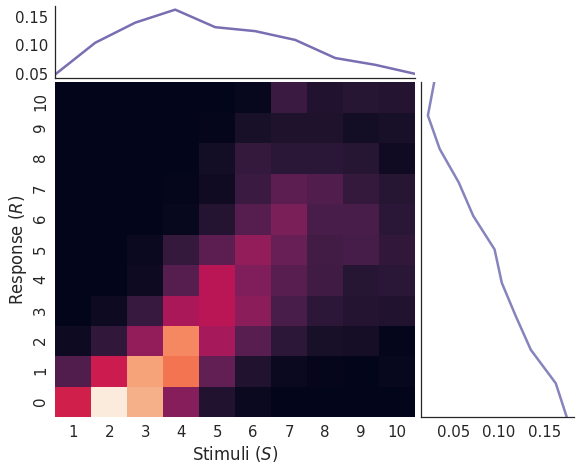

In [17]:
import matplotlib.gridspec as gridspec
from pandas import crosstab
from scipy.io import loadmat
data = loadmat('NeurResps.mat')
R = data['R'][:,0]
S = data['S'][:,0]

N = len(S) # number of samples

allR = np.unique(R)      # range of values in R
allS = np.unique(S)  # range of values in S

## Compute joint distribution.
counts = crosstab(S, R).as_matrix()
Psr = counts / counts.sum()

## Compute marginal distribution.
Ps = Psr.sum(axis=1)
Pr = Psr.sum(axis=0)

## Initialize canvas.
fig = plt.figure(figsize=(8,6))

## Joint density.
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.075, right=0.70, bottom=0.025, top=0.80)

ax = plt.subplot(gs[0])
sns.heatmap(Psr.T, cbar=False, xticklabels=allS, yticklabels=allR, ax=ax)
ax.set(xlabel='Stimuli ($S$)', ylabel='Response ($R$)')
ax.invert_yaxis()

## Marginal density (S).
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.075, right=0.70, bottom=0.81, top=0.975)

ax = plt.subplot(gs[0])
ax.plot(allS, Ps, lw=2.5, color='#796eb2')
ax.set(xlim=(allS.min(), allS.max()), xticks=[])
sns.despine(ax=ax)

## Marginal density (R).
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.71, right=0.975, bottom=0.025, top=0.80)

ax = plt.subplot(gs[0])
ax.plot(Pr, allR, lw=2.5, color='#8683bd')
ax.set(ylim=(allR.min(), allR.max()), yticks=[])
sns.despine(top=True, left=False, right=True, ax=ax)

Now use the sample distribution computed above to compute:

**c)** the entropy $H(S)$

In [18]:
## Define useful functions.
def entropy(p):
    p = p[p > 0] # Error-catching.
    return -np.dot(p, np.log2(p))

Hs = entropy(Ps)
print('H(S) = %0.3f' %Hs)

H(S) = 3.214


**d)** the entropy $H(R)$

In [19]:
Hr = entropy(Pr)
print('H(S) = %0.3f' %Hr)

H(S) = 3.217


**e)** the mutual information $I(S,R)$

In [20]:
MI = np.nansum( Psr * np.ma.log2(Psr / np.outer(Ps, Pr) ).filled(0) )
print('I(S,R) = %0.3f' %MI)

I(S,R) = 0.707


**12. Correlation and Mutual Information.**

In this problem you will be asked to make up your own 2D discrete probability distribution $P(X,Y)$ for the joint distribution of two random
  variables $X$ and $Y$.  

**a)** Generate a $(10 \times 10)$ joint distribution such that $X$
  and $Y$ are completely uncorrelated but have high mutual
  information.  Make an image plot of $P(X,Y)$.  
**(2 points)**

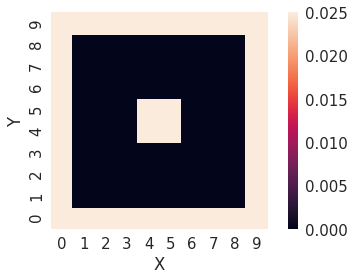

In [21]:
def FunkyPDF(x,y):
    if np.any(np.in1d([x,y],[0,9])): return 1
    if np.all(np.in1d([x,y],[4,5])): return 1
    else: return 0

## Define grid.
X = np.arange(10, dtype=int)
Y = np.arange(10, dtype=int)
J = np.array(np.meshgrid(X,Y)).T.reshape(10**2,2)

## Define PDF.
Pj = np.array([FunkyPDF(x,y) for x, y in J]).astype(float)
Pj /= Pj.sum()
Pj = Pj.reshape(10,10)

## Plotting.
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.heatmap(Pj, square=True, ax=ax);
ax.set(xlabel='X', ylabel='Y')
ax.invert_yaxis()

plt.tight_layout()

**b)** Compute the correlation coefficient of $X$ and $Y$ using the formula 

$$ corrcoeff = \frac{E[ (X-E[X])(Y-E[Y])]}{\sqrt{\mathrm{var}(X) \mathrm{var}(Y)}}$$

**(2 points)**

We can re-express the correlation coefficient as the following:

$$ corrcoeff = \frac{E[ (X-E[X])(Y-E[Y])]}{\sqrt{\mathrm{var}(X) \mathrm{var}(Y)}}$$

$$ = \frac{E[XY - XE[Y] - E[X]Y + E[X]E[Y]]}{\sqrt{E[(X-E[X])^2]}\sqrt{E[(Y-E[Y])^2]}} $$

$$ = \frac{E[XY] - E[X]E[Y] - E[X]E[Y] + E[X]E[Y]}{\sqrt{E[X^2]-E[X]^2}\sqrt{E[Y^2]-E[Y]^2}}$$

$$ = \frac{E[XY] - E[X]E[Y]}{\sqrt{E[X^2]-E[X]^2}\sqrt{E[Y^2]-E[Y]^2}}$$

where
1. $ E[X] = x \cdot p(x) $
2. $ E[Y] = y \cdot p(y) $
3. $ E[XY] = x \cdot y \cdot p(x,y)$
4. $ E[X^2] = x^2 \cdot p(x) $
5. $ E[Y^2] = y^2 \cdot p(y) $

In [22]:
## Compute expectations.
Ex = X @ Pj.sum(axis=0)
Ey = Y @ Pj.sum(axis=1)
Exy = np.prod(J, axis=-1) @ Pj.flatten()
Ex2 = X ** 2 @ Pj.sum(axis=0)
Ey2 = Y ** 2 @ Pj.sum(axis=1)

## Compute correlation.
corrcoef = (Exy - Ex*Ey) / ( np.sqrt(Ex2 - Ex**2) * np.sqrt(Ey2 - Ey**2) )
print('corrcoef(x,y) = %0.3f' %corrcoef)

corrcoef(x,y) = 0.000


**c)** Compute the mutual information between $X$ and $Y$.  
**(1 point)**

In [23]:
## Compute marginal density of X.
Px = Pj.sum(axis=0)
Px /= Px.sum()

## Compute marginal density of Y.
Py = Pj.sum(axis=1)
Py /= Py.sum()

## Compute mutual information.
MI = np.nansum( Pj * np.ma.log2(Pj / np.outer(Px, Py) ).filled(0) )
print('I(X,Y) = %0.3f' %MI)

I(X,Y) = 0.600
